In [9]:
import pandas as pd
import seaborn as sb

from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

In [10]:
A = pd.read_json("../Data/Load/400VU/MI1/10W-400VU-load-a-report3.json")
B = pd.read_json("../Data/Load/400VU/MI1/10W-400VU-load-b-report1.json")
C = pd.read_json("../Data/Load/400VU/MI1/10W-400VU-load-c-report2.json")

In [11]:
 def get_time_series(dataframe: pd.DataFrame) -> pd.Series:
    number_of_rows = len(dataframe.index)

    return pd.Series(
        name='time',
        data=[element * 10 for element in range(number_of_rows)]
    )

In [15]:
 def get_concurrency(time: pd.Series, dataframe: pd.DataFrame) -> pd.DataFrame:
    concurrency = pd.concat([time, dataframe['concurrency']], axis=1)
    concurrency['concurrency'] = gaussian_filter1d(sigma=0.3, input=concurrency['concurrency'])
    return concurrency.set_index('time')

In [16]:
time = get_time_series(A)
concurrency_a = get_concurrency(time, A).rename(columns={"concurrency": "A"})
concurrency_b = get_concurrency(time, B).rename(columns={"concurrency": "B"})
concurrency_c = get_concurrency(time, C).rename(columns={"concurrency": "C"})

Text(0.5, 0, 'Zeit (s)')

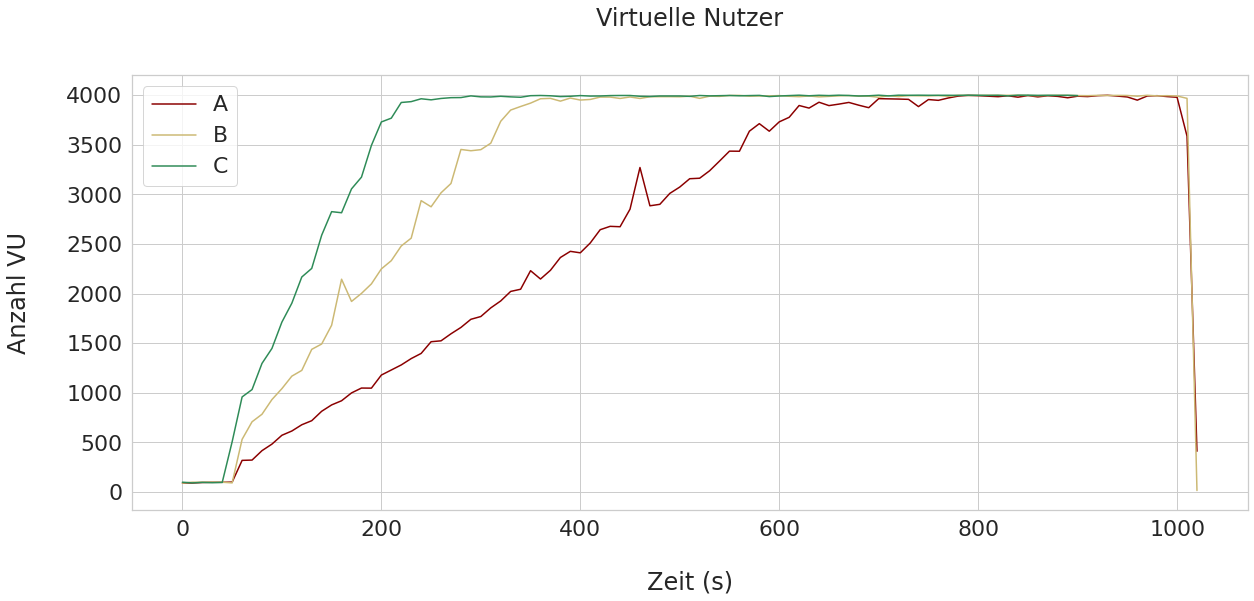

In [18]:
sb.set(font_scale=2) 
sb.set_style("whitegrid")
figure = plt.figure(figsize = (20,8))

# Plots
concurrency_plot = sb.lineplot(
    data=concurrency_a,
    legend="auto",
    palette=['darkred']
)
concurrency_plot = sb.lineplot(
    data=concurrency_b,
    palette=['y']
)
concurrency_plot = sb.lineplot(
    data=concurrency_c,
    palette=['seagreen']
)


# Label settings
concurrency_plot.set_title('Virtuelle Nutzer', y=1.1)
concurrency_plot.set_ylabel('Anzahl VU', labelpad=35)
concurrency_plot.set_xlabel('Zeit (s)', labelpad=30)

In [19]:
figure.subplots_adjust(right=0.85, top=0.88, bottom=0.20)
figure.savefig('./400VU_ABC.pdf')